In [2]:
%load_ext autoreload
%autoreload 2
from nnTrain import train_efn, train_pfn, arch_scan, get_data
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Process

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Quark jets, R = 0.8

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 60)     240         input[0][0]                      
__________________________________________________________________________________________________
activation_8 (Activation)       (None, None, 60)     0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 60)     3660        activation_8[0][0]               
__________________________________________________________________________________________________
activation

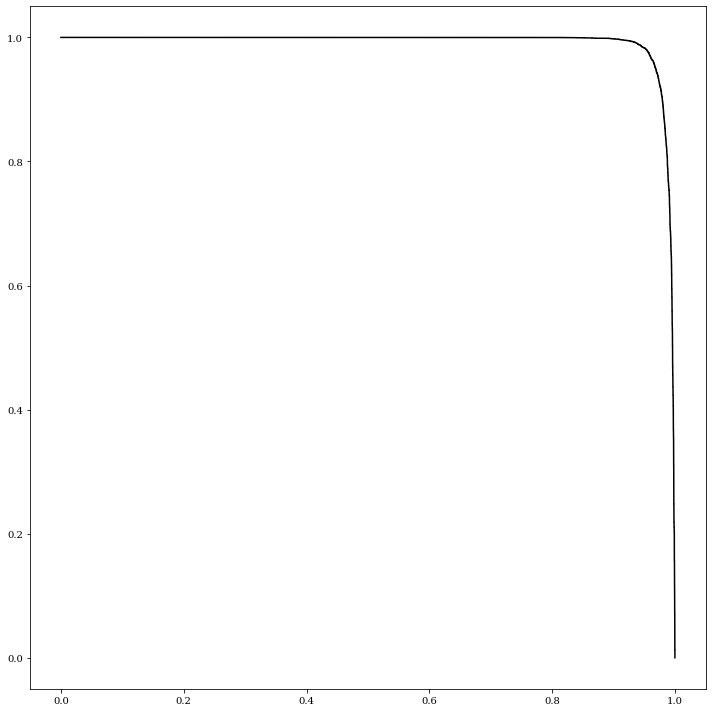

In [4]:
model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                "input_dim":3,
                "output_dim":1,"output_act":"sigmoid",
                "loss":"binary_crossentropy",
                "summary":True}
train_kwargs = {"epochs":10,"verbose":1,"batch_size":10000}
pfn, auc, pfn_fp, pfn_tp, threshs = train_pfn("h2qq_R0.8_mH500.h5",model_kwargs,train_kwargs,plot=True)

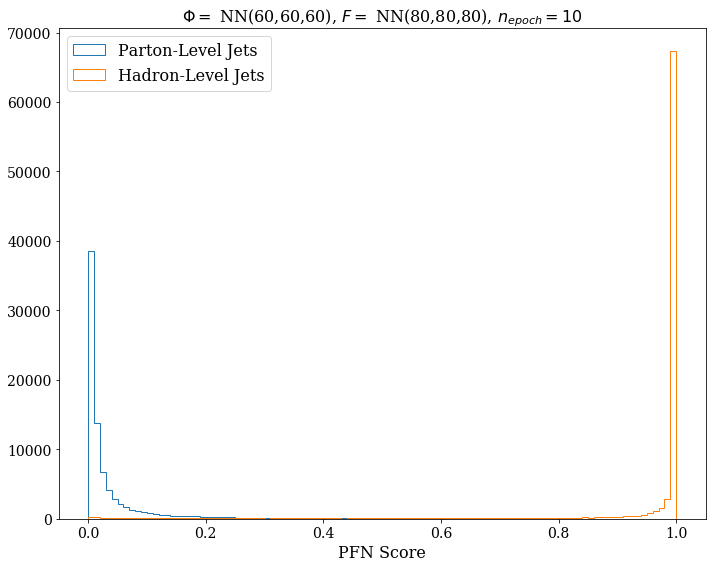

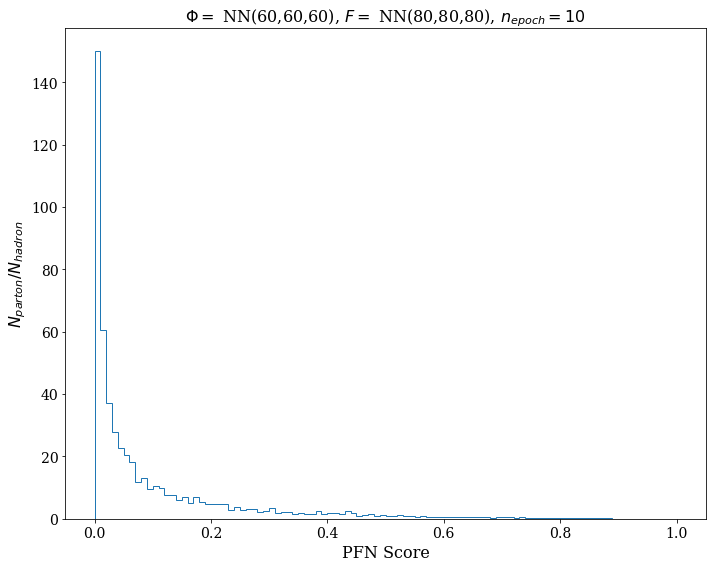

In [6]:
from nnTrain import get_data
X,Y = get_data("h2qq_R0.8_mH500.h5")
preds = pfn.predict(X, batch_size=1000)
preds = preds[:,0]

plt.figure(figsize=(10,8))
pred_parton = preds[Y==0]
pred_hadron = preds[Y==1]
bins = np.arange(0,1.01,0.01)
hp = plt.hist(pred_parton,bins=bins,histtype='step',label="Parton-Level Jets")
hh = plt.hist(pred_hadron,bins=bins,histtype='step',label="Hadron-Level Jets")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("PFN Score",fontsize=16)
plt.legend(loc='upper left',fontsize=16)
plt.title(r"$\Phi = $ NN(60,60,60), $F = $ NN(80,80,80), $n_{epoch} = 10$",fontsize=16)
plt.savefig("PFN_scores_PartonVsHadron_qJets.pdf")

ratio = np.where(hh[0]>0,hp[0]/hh[0],np.zeros_like(hp[0]))
plt.figure(figsize=(10,8))
bin_centers = (bins[:-1]+bins[1:])/2
bin_width = bins[1]-bins[0]
plt.hist(bin_centers,weights=ratio,bins=bins,histtype='step')
plt.title(r"$\Phi = $ NN(60,60,60), $F = $ NN(80,80,80), $n_{epoch} = 10$",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("PFN Score",fontsize=16)
plt.ylabel(r"$N_{parton} / N_{hadron}$",fontsize=16)
plt.savefig("PFN_PartonHadronRatio_qJets.pdf")

# Gluon Jets, R = 0.8

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
phats_input (InputLayer)        (None, None, 2)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 60)     180         phats_input[0][0]                
__________________________________________________________________________________________________
activation_8 (Activation)       (None, None, 60)     0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 60)     3660        activation_8[0][0]               
__________________________________________________________________________________________________
activation

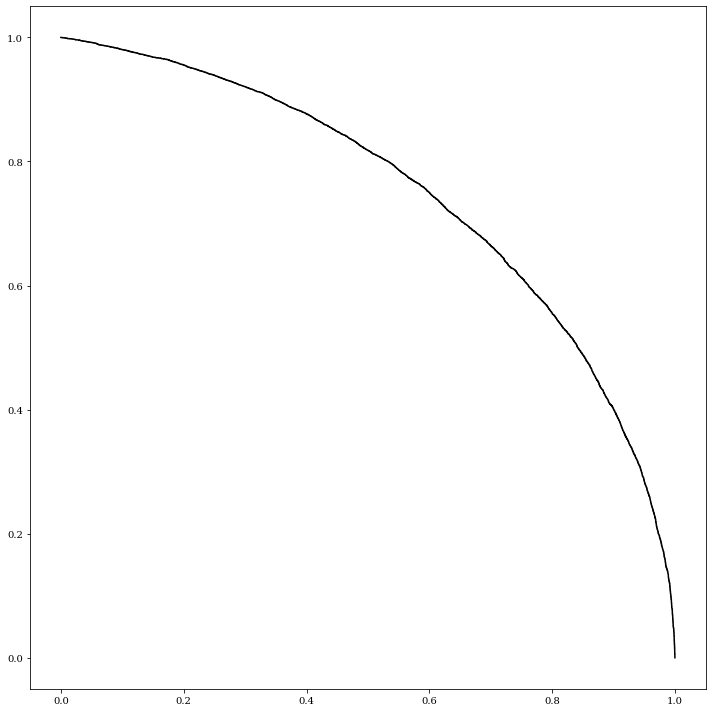

In [5]:
model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                "input_dim":2,
                "output_dim":1,"output_act":"sigmoid",
                "loss":"binary_crossentropy",
                "summary":True}
train_kwargs = {"epochs":10,"verbose":1,"batch_size":10000}
efn, auc, efn_fp, efn_tp, threshs = train_efn("h2gg_R0.8_mH500.h5",model_kwargs,train_kwargs,plot=True)

/home/sambt/.conda/envs/sambt-uproot/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


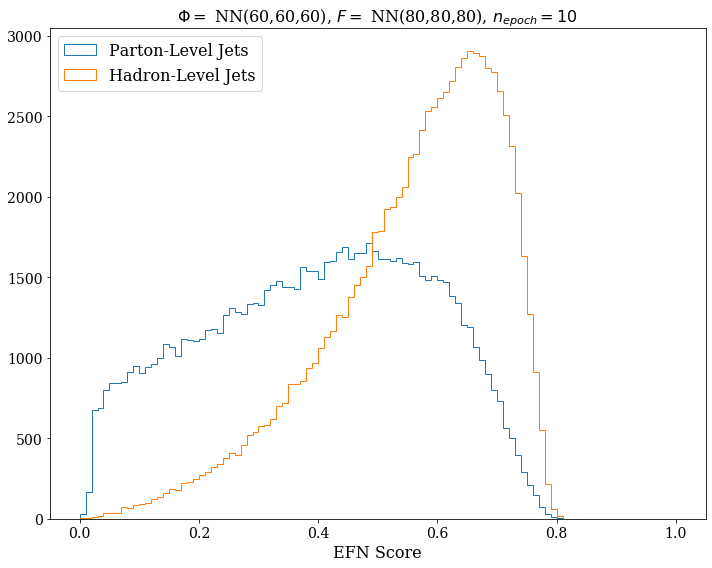

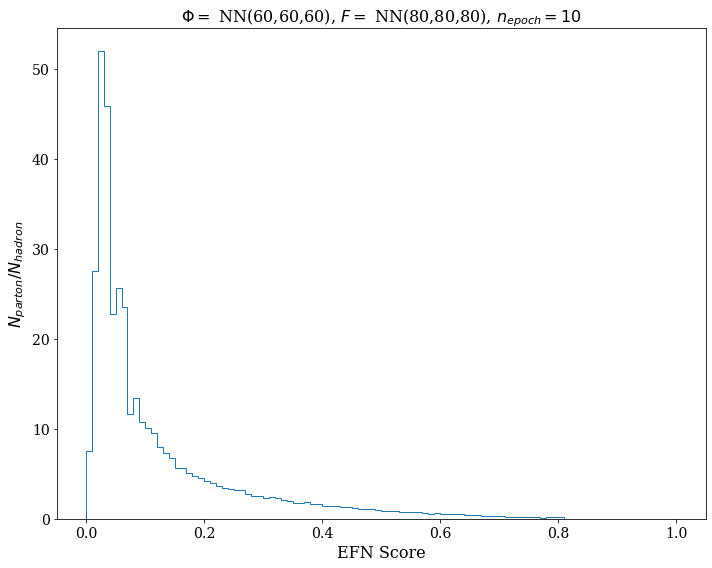

In [6]:
from nnTrain import get_data
X,Y = get_data("h2gg_R0.8_mH500.h5")
z = X[:,:,0]
p = X[:,:,1:]
preds = efn.predict([z, p], batch_size=1000)
preds = preds[:,0]

plt.figure(figsize=(10,8))
pred_parton = preds[Y==0]
pred_hadron = preds[Y==1]
bins = np.arange(0,1.01,0.01)
hp = plt.hist(pred_parton,bins=bins,histtype='step',label="Parton-Level Jets")
hh = plt.hist(pred_hadron,bins=bins,histtype='step',label="Hadron-Level Jets")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("EFN Score",fontsize=16)
plt.legend(loc='upper left',fontsize=16)
plt.title(r"$\Phi = $ NN(60,60,60), $F = $ NN(80,80,80), $n_{epoch} = 10$",fontsize=16)
plt.savefig("EFN_scores_PartonVsHadron_gJets.pdf")

ratio = np.where(hh[0]>0,hp[0]/hh[0],np.zeros_like(hp[0]))
plt.figure(figsize=(10,8))
bin_centers = (bins[:-1]+bins[1:])/2
bin_width = bins[1]-bins[0]
plt.hist(bin_centers,weights=ratio,bins=bins,histtype='step')
plt.title(r"$\Phi = $ NN(60,60,60), $F = $ NN(80,80,80), $n_{epoch} = 10$",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("EFN Score",fontsize=16)
plt.ylabel(r"$N_{parton} / N_{hadron}$",fontsize=16)
plt.savefig("EFN_PartonHadronRatio_gJets.pdf")